<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula10a_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p datasets
!mkdir -p datasets/bitcoin

In [2]:
!wget https://gist.githubusercontent.com/Dudu197/a9a38c424fd41f82dc27ff34d8ee170f/raw/79927733065e72bbe8ab4d0a7255855e79584ae4/coin_prices.csv -P datasets/bitcoin

--2024-05-19 15:22:46--  https://gist.githubusercontent.com/Dudu197/a9a38c424fd41f82dc27ff34d8ee170f/raw/79927733065e72bbe8ab4d0a7255855e79584ae4/coin_prices.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8883805 (8.5M) [text/plain]
Saving to: ‘datasets/bitcoin/coin_prices.csv.1’

coin_prices.csv.1   100%[===================>]   8.47M  42.0MB/s    in 0.2s    

2024-05-19 15:22:46 (42.0 MB/s) - ‘datasets/bitcoin/coin_prices.csv.1’ saved [8883805/8883805]



In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras

2024-05-21 18:45:37.366867: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 18:45:37.391739: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 18:45:37.725709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("datasets/bitcoin/coin_prices.csv")

In [3]:
df = df[df["coin"] == "BTC"]

In [4]:
df

,Unnamed: 0,date,coin,volume,price
53,53,2021-05-13,BTC,7.852778e+10,47884.917106
154,154,2021-05-14,BTC,9.149487e+10,49997.846250
253,253,2021-05-15,BTC,5.551275e+10,50189.527235
353,353,2021-05-16,BTC,5.997922e+10,47480.816852
453,453,2021-05-17,BTC,6.306813e+10,46211.384370
...,...,...,...,...,...
90954,90954,2023-11-09,BTC,1.751828e+10,35661.036826
91054,91054,2023-11-10,BTC,3.753632e+10,36680.129620
91155,91155,2023-11-11,BTC,2.254243e+10,37338.914097
91254,91254,2023-11-12,BTC,1.390765e+10,37135.295578


In [5]:
from matplotlib import pyplot as plt

<Axes: >

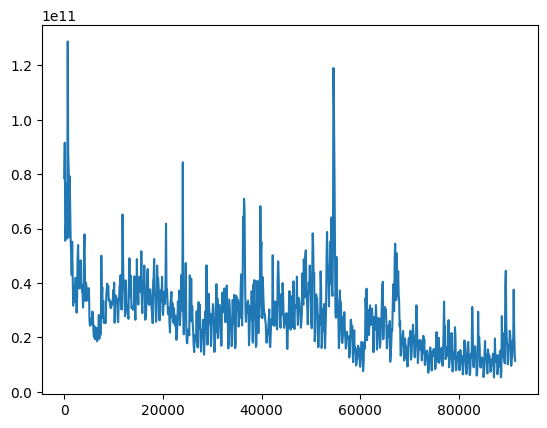

In [6]:
df["volume"].plot()

<Axes: >

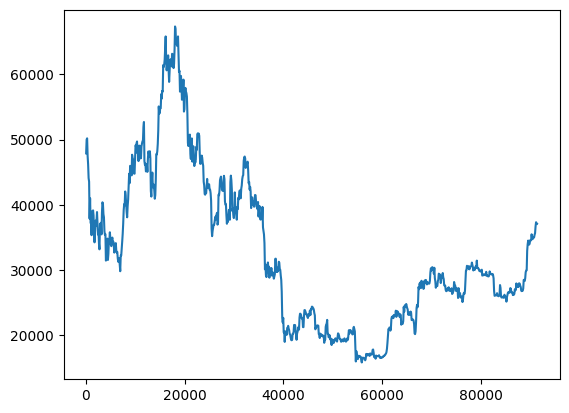

In [7]:
df["price"].plot()

In [8]:
num_train_samples = int(0.5 * len(df))
num_val_samples = int(0.25 * len(df))
num_test_samples = len(df) - num_train_samples - num_val_samples
(num_train_samples, num_val_samples, num_test_samples)

(457, 228, 229)

In [9]:
price_mean = df.iloc[:num_train_samples]["price"].mean(axis=0)
df["price"] -= price_mean
price_std = df.iloc[:num_train_samples]["price"].std(axis=0)
df["price"] /= price_std

In [10]:
volume_mean = df.iloc[:num_train_samples]["volume"].mean(axis=0)
df["volume"] -= price_mean
volume_std = df.iloc[:num_train_samples]["volume"].std(axis=0)
df["volume"] /= price_std

In [11]:
prices = df["price"].values
prices = np.concatenate([prices[1:], [prices[-1]]])
df["next_price"] = prices

In [12]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data = df.iloc[:num_train_samples][["volume", "price"]].values,
    targets = df.iloc[:num_train_samples]["next_price"].values,
    sequence_length = 3,
    batch_size = 32,
    shuffle = True,
)
for inputs, targets in dummy_dataset:
  for i in range(inputs.shape[0]):
    print([x for x in inputs[i]])
    print(int(targets[i]))
    break

2024-05-21 18:45:45.474493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 18:45:45.498476: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 18:45:45.498950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 18:45:45.500463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 18:45:45.500663: I tensorflow/compile

[<tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.36175638e+06, -6.07241486e-01])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.16596378e+06, -5.32369483e-01])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.25002805e+06, -4.90069818e-01])>]
0
[<tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 3.75919436e+06, -1.91526149e+00])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 3.14409140e+06, -1.78996007e+00])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.73491073e+06, -1.77190399e+00])>]
-1
[<tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.34787906e+06, -3.17307018e-01])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.80356031e+06, -3.16730917e-01])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([ 2.25080750e+06, -2.81001906e-01])>]
0
[<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.47331233e+06, 1.79006328e+00])>, <tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.71990994e+06, 1.50448351e+00])>, <tf.Tensor: sh

In [13]:
num_train_samples

457

In [14]:
len(df)

914

In [15]:
sampling_rate = 6
sequence_length = 7
batch_size = 256
train_dataset = keras.utils.timeseries_dataset_from_array(
    data = df.iloc[:num_train_samples][["volume", "price"]].values,
    targets = df.iloc[:num_train_samples]["next_price"].values,
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size)

val_index = num_train_samples + num_val_samples
val_dataset = keras.utils.timeseries_dataset_from_array(
    data = df.iloc[num_train_samples:val_index][["volume", "price"]].values,
    targets = df.iloc[num_train_samples:val_index]["next_price"].values,
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size)

test_index = val_index + num_test_samples
test_dataset = keras.utils.timeseries_dataset_from_array(
    data = df.iloc[val_index:][["volume", "price"]].values,
    targets = df.iloc[val_index:]["next_price"].values,
    sampling_rate = sampling_rate,
    sequence_length = sequence_length,
    shuffle = True,
    batch_size = batch_size)

In [16]:
for samples, targets in train_dataset:
  print("samples shape", samples.shape)
  print("targets shape", targets.shape)
  break

samples shape (256, 7, 2)
targets shape (256,)


# baseline

In [17]:
def evaluate_naive_method(dataset):
  total_abs_err = 0.
  samples_seen = 0
  for samples, targets in dataset:
    preds = samples[:, -1, 1]
    total_abs_err += np.sum(np.abs(preds - targets))
    samples_seen += samples.shape[0]
  return total_abs_err / samples_seen
print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 0.23
Test MAE: 0.26


# densely conected

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, 2))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("btc_b_dense.model",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model = keras.models.load_model("btc_b_dense.model")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 2717809377280.0000 - mae: 1609118.7500INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 1s 317ms/step - loss: 2140406415360.0000 - mae: 1404939.0000 - val_loss: 812214452224.0000 - val_mae: 812613.5000
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 716053151744.0000 - mae: 819847.3750INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 337ms/step - loss: 622501036032.0000 - mae: 753565.1875 - val_loss: 329232384000.0000 - val_mae: 471857.4062
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 242085560320.0000 - mae: 453216.0312INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 269ms/step - loss: 205181075456.0000 - mae: 406415.0000 - val_loss: 152555569152.0000 - val_mae: 272931.3438
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 85825126400.0000 - mae: 232422.3438INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 271ms/step - loss: 72186724352.0000 - mae: 206534.5312 - val_loss: 95125102592.0000 - val_mae: 205840.2031
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 39309959168.0000 - mae: 144261.8281INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 420ms/step - loss: 38954205184.0000 - mae: 142675.1562 - val_loss: 74720460800.0000 - val_mae: 188409.5156
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 35556548608.0000 - mae: 136547.9219INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 347ms/step - loss: 31123126272.0000 - mae: 130265.4531 - val_loss: 65406644224.0000 - val_mae: 178755.1250
Epoch 7/10
1/2 [==============>...............] - ETA: 0s - loss: 29486409728.0000 - mae: 127197.6484INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 400ms/step - loss: 27607482368.0000 - mae: 124071.3047 - val_loss: 57414336512.0000 - val_mae: 169186.2969
Epoch 8/10
1/2 [==============>...............] - ETA: 0s - loss: 25441310720.0000 - mae: 118739.6016INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 306ms/step - loss: 24526219264.0000 - mae: 117550.9297 - val_loss: 49906331648.0000 - val_mae: 159366.9531
Epoch 9/10
1/2 [==============>...............] - ETA: 0s - loss: 20153681920.0000 - mae: 108819.5156INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


2/2 [==============================] - 0s 265ms/step - loss: 21725003776.0000 - mae: 111417.7422 - val_loss: 42780127232.0000 - val_mae: 148922.0156
Epoch 10/10
1/2 [==============>...............] - ETA: 0s - loss: 20168472576.0000 - mae: 106750.2422INFO:tensorflow:Assets written to: btc_b_dense.model/assets


INFO:tensorflow:Assets written to: btc_b_dense.model/assets


1/1 [==============================] - 0s 70ms/step - loss: 6757544448.0000 - mae: 66603.2656
Test MAE: 66603.27


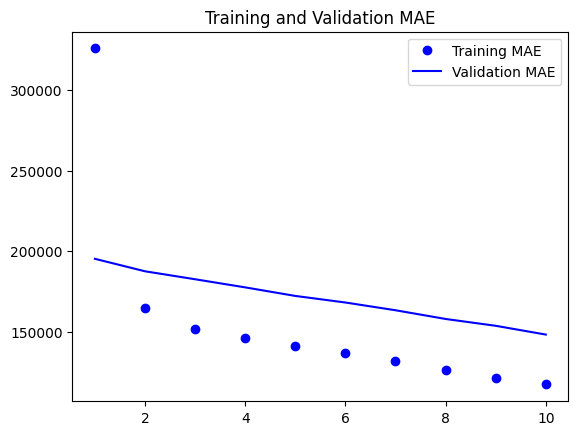

In [19]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss)+1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

# LSTM

In [36]:
inputs = keras.Input(shape=(sequence_length, 2))
x = layers.LSTM(16)(inputs)
x = layers.LSTM(32)(inputs)
x = layers.LSTM(64)(inputs)
x = layers.Dense(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("btc_b_lstm.model",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model = keras.models.load_model("btc_b_lstm.model")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 1793967915008.0000 - mae: 1281364.8750INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 1s 272ms/step - loss: 1733051547648.0000 - mae: 1251885.2500 - val_loss: 1313766768640.0000 - val_mae: 1024332.5625
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 1403054587904.0000 - mae: 1126588.2500INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 0s 370ms/step - loss: 1354449289216.0000 - mae: 1106297.3750 - val_loss: 1091549724672.0000 - val_mae: 933691.8750
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 1164320702464.0000 - mae: 1023976.5000INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 0s 268ms/step - loss: 1131109416960.0000 - mae: 1011008.3750 - val_loss: 927562727424.0000 - val_mae: 860703.4375
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 1010007605248.0000 - mae: 952178.4375INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 0s 225ms/step - loss: 963700523008.0000 - mae: 932952.2500 - val_loss: 796592373760.0000 - val_mae: 797627.1250
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 843742511104.0000 - mae: 871974.1250INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 0s 224ms/step - loss: 827864842240.0000 - mae: 865041.6250 - val_loss: 685768769536.0000 - val_mae: 740066.5000
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 717677789184.0000 - mae: 808353.5000INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 0s 231ms/step - loss: 712733687808.0000 - mae: 802837.6875 - val_loss: 590511079424.0000 - val_mae: 686745.6250
Epoch 7/10
1/2 [==============>...............] - ETA: 0s - loss: 633686327296.0000 - mae: 756576.6875INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 0s 224ms/step - loss: 613913133056.0000 - mae: 744831.6250 - val_loss: 508374974464.0000 - val_mae: 637197.3750
Epoch 8/10
1/2 [==============>...............] - ETA: 0s - loss: 545927954432.0000 - mae: 701867.5000INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 0s 215ms/step - loss: 528248930304.0000 - mae: 690894.7500 - val_loss: 436281180160.0000 - val_mae: 590289.5625
Epoch 9/10
1/2 [==============>...............] - ETA: 0s - loss: 479662342144.0000 - mae: 656960.5625INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


2/2 [==============================] - 0s 238ms/step - loss: 453204606976.0000 - mae: 639719.4375 - val_loss: 373144322048.0000 - val_mae: 545909.1250
Epoch 10/10
1/2 [==============>...............] - ETA: 0s - loss: 406494412800.0000 - mae: 606711.8750INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm.model/assets


1/1 [==============================] - 0s 78ms/step - loss: 68961992704.0000 - mae: 244334.7031
Test MAE: 244334.70


# dropout-regularized LSTM

In [21]:
inputs = keras.Input(shape=(sequence_length, 2))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("btc_b_lstm_dropout.model",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model = keras.models.load_model("btc_b_lstm_dropout.model")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1/2 [==============>...............] - ETA: 1s - loss: 1.0825 - mae: 0.8093INFO:tensorflow:Assets written to: btc_b_lstm_dropout.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm_dropout.model/assets


2/2 [==============================] - 2s 1s/step - loss: 1.0480 - mae: 0.7912 - val_loss: 3.1899 - val_mae: 1.7729
Epoch 2/10
2/2 [==============================] - 0s 83ms/step - loss: 1.0914 - mae: 0.8309 - val_loss: 3.2406 - val_mae: 1.7872
Epoch 3/10
2/2 [==============================] - 0s 66ms/step - loss: 1.1029 - mae: 0.8123 - val_loss: 3.2559 - val_mae: 1.7914
Epoch 4/10
2/2 [==============================] - 0s 62ms/step - loss: 1.0934 - mae: 0.8106 - val_loss: 3.2805 - val_mae: 1.7983
Epoch 5/10
2/2 [==============================] - 0s 63ms/step - loss: 1.1099 - mae: 0.8322 - val_loss: 3.3066 - val_mae: 1.8055
Epoch 6/10
2/2 [==============================] - 0s 66ms/step - loss: 1.1634 - mae: 0.8395 - val_loss: 3.3210 - val_mae: 1.8095
Epoch 7/10
2/2 [==============================] - 0s 62ms/step - loss: 1.0956 - mae: 0.8210 - val_loss: 3.3474 - val_mae: 1.8168
Epoch 8/10
2/2 [==============================] - 0s 58ms/step - loss: 0.9977 - mae: 0.7843 - val_loss: 3.3692

1/1 [==============================] - 0s 132ms/step - loss: 1.0597 - mae: 1.0193
Test MAE: 1.02


# bidirectional LSTM

In [22]:
inputs = keras.Input(shape=(sequence_length, 2))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("btc_b_lstm_bidirectional.model",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=['mae'])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data = val_dataset,
                    callbacks = callbacks)
model = keras.models.load_model("btc_b_lstm_bidirectional.model")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
1/2 [==============>...............] - ETA: 1s - loss: 0.8725 - mae: 0.7112INFO:tensorflow:Assets written to: btc_b_lstm_bidirectional.model/assets


INFO:tensorflow:Assets written to: btc_b_lstm_bidirectional.model/assets


2/2 [==============================] - 5s 4s/step - loss: 0.8803 - mae: 0.7182 - val_loss: 3.4288 - val_mae: 1.8391
Epoch 2/10
2/2 [==============================] - 0s 58ms/step - loss: 0.8700 - mae: 0.7145 - val_loss: 3.5011 - val_mae: 1.8586
Epoch 3/10
2/2 [==============================] - 0s 44ms/step - loss: 0.8647 - mae: 0.7128 - val_loss: 3.5591 - val_mae: 1.8742
Epoch 4/10
2/2 [==============================] - 0s 38ms/step - loss: 0.8610 - mae: 0.7116 - val_loss: 3.6145 - val_mae: 1.8889
Epoch 5/10
2/2 [==============================] - 0s 41ms/step - loss: 0.8581 - mae: 0.7107 - val_loss: 3.6623 - val_mae: 1.9015
Epoch 6/10
2/2 [==============================] - 0s 50ms/step - loss: 0.8556 - mae: 0.7101 - val_loss: 3.6912 - val_mae: 1.9091
Epoch 7/10
2/2 [==============================] - 0s 66ms/step - loss: 0.8541 - mae: 0.7096 - val_loss: 3.7233 - val_mae: 1.9175
Epoch 8/10
2/2 [==============================] - 0s 42ms/step - loss: 0.8528 - mae: 0.7092 - val_loss: 3.7580